# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:
#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude
#
#After each plot add a sentence or too explaining what the code is and analyzing.
#City	Country	Date	Lat	Lng	Cloudiness	Humidity	Max Temp	Wind Speed

# List for holding lat_lngs and cities
n = 750
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
#        cities.append(city)
#        Add the data to our lists
         cities.append(city)
         country_codes.append(city)
    
         country_codes = [x.upper() for x in country_codes]

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
# Build partial query URL
query = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
dates = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate will not have data in openweathermap, so set their values to NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # When it is not cloudy and clouds does not exist, so set value to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
    
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")


# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Country": country_codes,
                           "Date": dates,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                          })


Processing record 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=mataura,MATAURA
Processing record 2 | andreapol
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=andreapol,ANDREAPOL
Processing record 3 | nueva loja
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=nueva loja,NUEVA LOJA
Processing record 4 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=udachnyy,UDACHNYY
Processing record 5 | glubokoe
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=glubokoe,GLUBOKOE
Processing record 6 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=lebu,LEBU
Processing record 7 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=429304a77

Processing record 55 | raga
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=raga,RAGA
Processing record 56 | houma
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=houma,HOUMA
Processing record 57 | bilibino
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=bilibino,BILIBINO
Processing record 58 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=bengkulu,BENGKULU
Processing record 59 | azar shahr
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=azar shahr,AZAR SHAHR
Processing record 60 | urumqi
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=urumqi,URUMQI
Processing record 61 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d44675

Processing record 109 | dafeng
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=dafeng,DAFENG
Processing record 110 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=lolua,LOLUA
Processing record 111 | asau
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=asau,ASAU
Processing record 112 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=tumannyy,TUMANNYY
Processing record 113 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ixtapa,IXTAPA
Processing record 114 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=souillac,SOUILLAC
Processing record 115 | vegueta
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e8

Processing record 163 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=rocha,ROCHA
Processing record 164 | west bay
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=west bay,WEST BAY
Processing record 165 | alta
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=alta,ALTA
Processing record 166 | artyk
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=artyk,ARTYK
Processing record 167 | ontario
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ontario,ONTARIO
Processing record 168 | stokmarknes
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=stokmarknes,STOKMARKNES
Processing record 169 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=4293

Processing record 217 | estevan
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=estevan,ESTEVAN
Processing record 218 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=mount isa,MOUNT ISA
Processing record 219 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=lorengau,LORENGAU
Processing record 220 | usinsk
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=usinsk,USINSK
Processing record 221 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=raudeberg,RAUDEBERG
Processing record 222 | maghama
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=maghama,MAGHAMA
Processing record 223 | kafanchan
http://api.openweathermap.org/data/2.5/weather?a

Processing record 272 | burgeo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=burgeo,BURGEO
Processing record 273 | miramar
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=miramar,MIRAMAR
Processing record 274 | akureyri
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=akureyri,AKUREYRI
Processing record 275 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=umzimvubu,UMZIMVUBU
Processing record 276 | ijaki
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ijaki,IJAKI
Processing record 277 | kiama
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=kiama,KIAMA
Processing record 278 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d4467574

Processing record 326 | tahe
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=tahe,TAHE
Processing record 327 | esso
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=esso,ESSO
Processing record 328 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=thinadhoo,THINADHOO
Processing record 329 | lerwick
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=lerwick,LERWICK
Processing record 330 | kantunilkin
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=kantunilkin,KANTUNILKIN
Processing record 331 | kijang
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=kijang,KIJANG
Processing record 332 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=429304a

Processing record 379 | yurimaguas
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=yurimaguas,YURIMAGUAS
Processing record 380 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sao filipe,SAO FILIPE
Processing record 381 | malanje
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=malanje,MALANJE
Processing record 382 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ahipara,AHIPARA
Processing record 383 | masvingo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=masvingo,MASVINGO
Processing record 384 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ilulissat,ILULISSAT
Processing record 385 | kieta
http://api.openweathermap.org/data/2.

Processing record 432 | sananduva
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sananduva,SANANDUVA
Processing record 433 | verkhniy baskunchak
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=verkhniy baskunchak,VERKHNIY BASKUNCHAK
Processing record 434 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=hofn,HOFN
Processing record 435 | iranshahr
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=iranshahr,IRANSHAHR
Processing record 436 | manger
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=manger,MANGER
Processing record 437 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=tarko-sale,TARKO-SALE
Processing record 438 | yar-sale
http://api.openw

Processing record 486 | mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=mogadishu,MOGADISHU
Processing record 487 | coxim
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=coxim,COXIM
Processing record 488 | samfya
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=samfya,SAMFYA
Processing record 489 | kathu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=kathu,KATHU
Processing record 490 | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=zapolyarnyy,ZAPOLYARNYY
Processing record 491 | mulege
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=mulege,MULEGE
Processing record 492 | semaria
http://api.openweathermap.org/data/2.5/weather?appid=429304a77

Processing record 540 | sibirskiy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sibirskiy,SIBIRSKIY
Processing record 541 | boffa
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=boffa,BOFFA
Processing record 542 | ballina
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ballina,BALLINA
Processing record 543 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=plettenberg bay,PLETTENBERG BAY
Processing record 544 | sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sobolevo,SOBOLEVO
Processing record 545 | varhaug
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=varhaug,VARHAUG
Processing record 546 | nanakuli
http://api.openweathermap.org/data

Processing record 594 | storslett
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=storslett,STORSLETT
Processing record 595 | balkhash
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=balkhash,BALKHASH
Processing record 596 | luena
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=luena,LUENA
Processing record 597 | ryotsu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ryotsu,RYOTSU
Processing record 598 | kyra
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=kyra,KYRA
Processing record 599 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=baykit,BAYKIT
Processing record 600 | katangli
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d4467574768

In [9]:
# The total sample size adn value count per field
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 9 columns):
City          619 non-null object
Country       619 non-null object
Date          560 non-null float64
Latitude      560 non-null float64
Longitude     560 non-null float64
Humidity      560 non-null float64
Max Temp      560 non-null float64
Cloudiness    619 non-null int64
Wind Speed    560 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 43.6+ KB


In [10]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
4,glubokoe,GLUBOKOE,NaN,NaN,NaN,NaN,NaN,0,NaN


In [11]:
len(weather_df)

619

In [12]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
4,glubokoe,GLUBOKOE,NaN,NaN,NaN,NaN,NaN,0,NaN


In [13]:
# Drop any records with NaN and reset index
weather_df.dropna(inplace=True)
weather_df.reset_index(drop=True)
weather_df.head()
#weather_df

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
5,lebu,LEBU,1.580011e+09,-37.62,-73.65,85.0,61.23,0,7.78


In [14]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 0 to 618
Data columns (total 9 columns):
City          560 non-null object
Country       560 non-null object
Date          560 non-null float64
Latitude      560 non-null float64
Longitude     560 non-null float64
Humidity      560 non-null float64
Max Temp      560 non-null float64
Cloudiness    560 non-null int64
Wind Speed    560 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 43.8+ KB


In [15]:
print(f"The weather dataframe contains {len(weather_df['City'])} unique cities.")

The weather dataframe contains 560 unique cities.


In [16]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
5,lebu,LEBU,1.580011e+09,-37.62,-73.65,85.0,61.23,0,7.78


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Save the DataFrame as a csv
weather_df.to_csv("../output_data/weather_data.csv", index=False, header=True)

In [18]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
5,lebu,LEBU,1.580011e+09,-37.62,-73.65,85.0,61.23,0,7.78


In [19]:
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

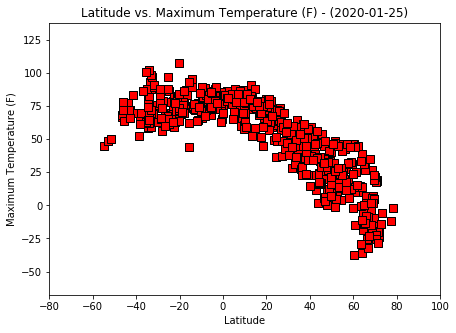

In [32]:
# Latitude vs. Temperature Plot
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 1.0, edgecolors = 'black', color = 'red',marker ="s", s=50)

# Add labeling
plt.title(f"Latitude vs. Maximum Temperature (F) - ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 30, max(weather_df['Max Temp']) + 30)
plt.savefig(f"../output_data/Max Temp.png")
plt.show()

In [33]:
# Humidity vs Latitude
# Shows that temperatures are higher near the equator and in the southern hemisphere.
# More temperatures werepulled in cities north of the equator.
# Those far north of the equator are below zero degrees as there appear to be more cities 
#     far north than far south provided by the weather api.

#### Latitude vs. Humidity Plot

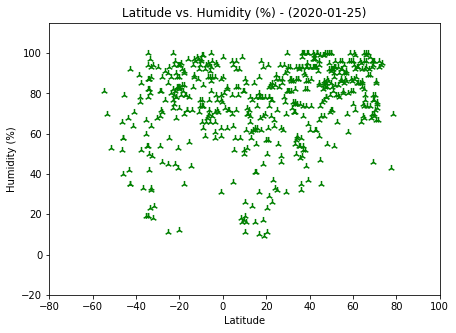

In [34]:
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 1.0, edgecolors = 'black', color = 'green',marker ="2", s=50)

# Add labeling
plt.title(f"Latitude vs. Humidity (%) - ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-20, 115)
plt.savefig(f"../output_data/Humidity.png")
plt.show()

In [35]:
# Humidity vs Latitude
# It appears that there is more humidity in warmer climates with this being the 
#    same for both north and south of the equator.  

#### Latitude vs. Cloudiness Plot

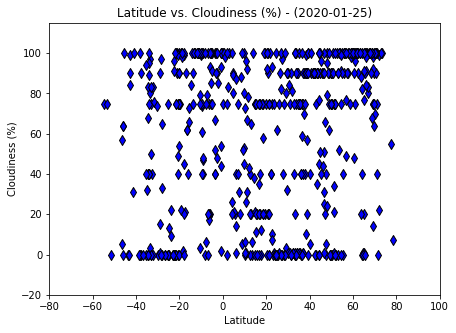

In [36]:
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 1.0, edgecolors = 'black', color = 'blue',marker ="d", s=50)

# Add labeling
plt.title(f"Latitude vs. Cloudiness (%) - ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-20, 115)
plt.savefig(f"../output_data/Cloudiness.png")
plt.show()

In [37]:
# Cloudiness vs Latitude
# It appears that it is more cloudy when warmer and north of the equator vs south of the equator.

#### Latitude vs. Wind Speed Plot

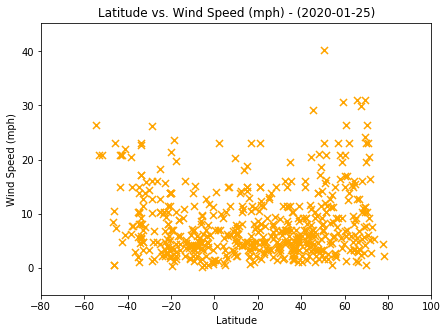

In [38]:
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 1.0, edgecolors = 'black', color = 'orange',marker ="x", s=50)

# Scatter plot labeling
plt.title(f"Latitude vs. Wind Speed (mph) - ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)
plt.savefig(f"../output_data/Wind Speed.png")
plt.show()

In [39]:
# Wind Speed vs Latitude 
# It appears wind speed generally stays in the 0 to 15 mph range with the northern hemisphere experiencing 
#    days with higher gust up to 40 mph on this particular day. 

## Linear Regression

In [40]:
# Create Northern and Southern Hemisphere DataFrames
# Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

# 0-City, 1-Country, 2-Date, 3-Latitude, 4-Longitude, 5-Humidity, 6-Max Temp, 7-Cloudiness, 8-Wind Speed

In [41]:
#Split original weather_df into a northern df where Latitude is greater than or equal to Zero
weather_nlat_df = weather_df[weather_df['Latitude'] >= 0]
weather_nlat_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
8,khatanga,KHATANGA,1.580011e+09,71.97,102.50,96.0,-23.94,22,2.64
9,liberal,LIBERAL,1.580011e+09,37.04,-100.92,69.0,35.60,1,3.27


In [42]:
#Split original weather_df into a southern df where Latitude is less than Zero
weather_slat_df = weather_df[weather_df['Latitude'] < 0]
weather_slat_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
5,lebu,LEBU,1.580011e+09,-37.62,-73.65,85.0,61.23,0,7.78
6,carnarvon,CARNARVON,1.580011e+09,-24.87,113.63,58.0,86.00,13,18.34
7,mercedes,MERCEDES,1.580011e+09,-34.65,-59.43,94.0,79.00,0,1.01
20,rikitea,RIKITEA,1.580011e+09,-23.12,-134.97,77.0,79.11,0,10.22


In [43]:
# OPTIONAL: Create a function to create Linear Regression plots to be utilized for the remainder of the plots by Hemisphere

def plotLinRegress(xlat,ydata,xlabel,ylabel,labelposition):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xlat, ydata)
    print(f"The r-squared is: {rvalue}")
    lin_regress_values = xlat * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xlat,ydata)
    plt.plot(xlat,lin_regress_values,"r-")
    plt.annotate(line_eq,labelposition,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8763160812873847


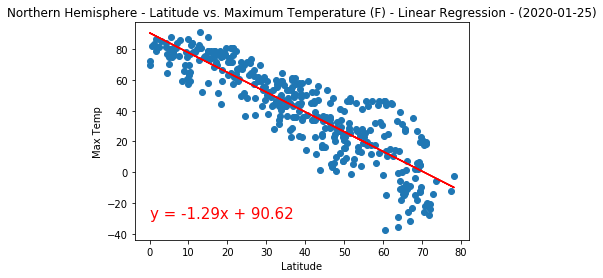

<Figure size 432x288 with 0 Axes>

In [44]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Maximum Temperature (F) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Max Temp"
labelposition = (0,-30)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Max Temp - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.28028930343648795


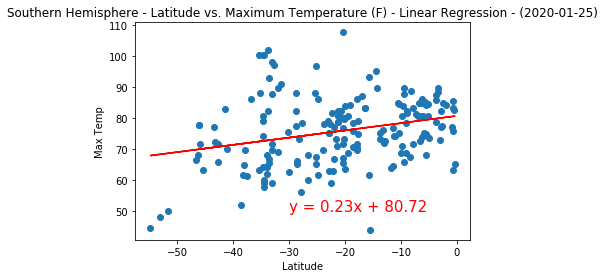

<Figure size 432x288 with 0 Axes>

In [45]:
#Southern Hemisphere - Latitude vs. Maximum Temperature (F) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Maximum Temperature (F) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Max Temp"
labelposition = (-30,50)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Max Temp - Linear Regression - Southern Hemisphere.png")

In [46]:
# Max Temp vs. Latitude Linear Regression
# This shows that both northern and southern hemispheres experience higher temperatures
#      if the city is closer to the equator
# Therefore, the closer you are to the equator the higher probably you will experience 
#      warmer days vs cities that are further from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38052704385215624


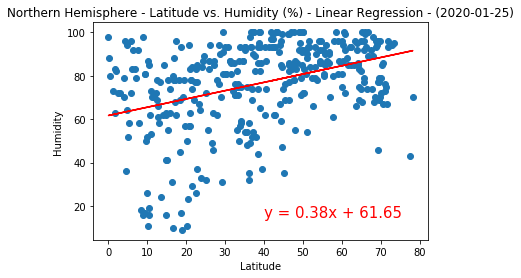

<Figure size 432x288 with 0 Axes>

In [47]:
#Northern Hemisphere - Latitude vs. Humidity (%) - Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Humidity (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Humidity"
labelposition = (40,15)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Humidity - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30884174230298983


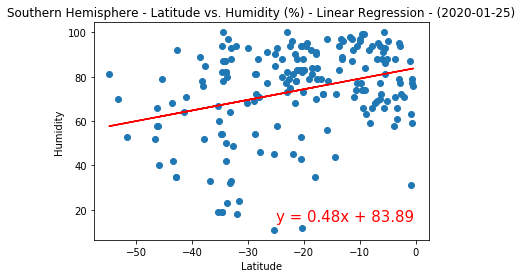

<Figure size 432x288 with 0 Axes>

In [48]:
#Southern Hemisphere - Latitude vs. Humidity (%) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Humidity (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Humidity"
labelposition = (-25,15)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Humidity - Linear Regression - Southern Hemisphere.png")

In [49]:
# Humidity (%) vs. Latitude Linear Regression
#  It appears in both hemispheres that the warmer it is the more Humidity you experience.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26864180356942785


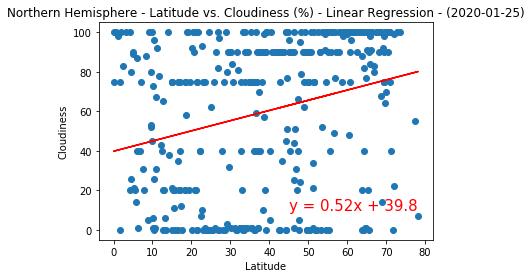

<Figure size 432x288 with 0 Axes>

In [50]:
#Northern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Cloudiness"
labelposition = (45,10)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Cloudiness - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26665925754323805


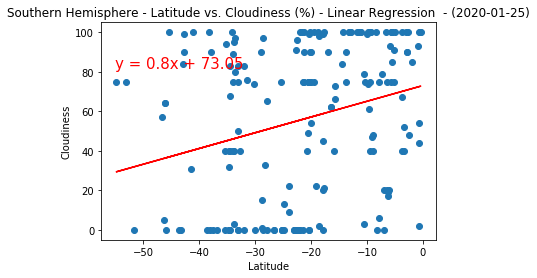

<Figure size 432x288 with 0 Axes>

In [51]:
#Southern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression  - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Cloudiness"
labelposition = (-55,82)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Cloudiness - Linear Regression - Southern Hemisphere.png")

In [52]:
# Cloudiness (%) vs. Latitude Linear Regression
#  It appears the northern hemisphere experiences more cloudy days than the southern hemisphere.
#  It appears that both hemispheres experience more cloudy days hen it is warmer.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19460844806195496


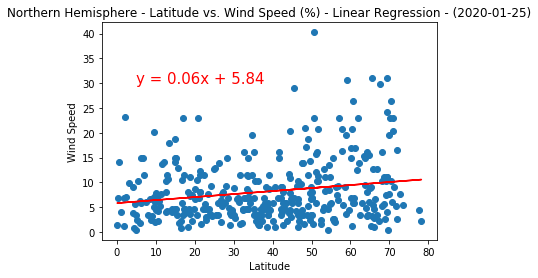

<Figure size 432x288 with 0 Axes>

In [53]:
#Northern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Wind Speed"
labelposition = (5,30)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Wind Speed - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4390222389769088


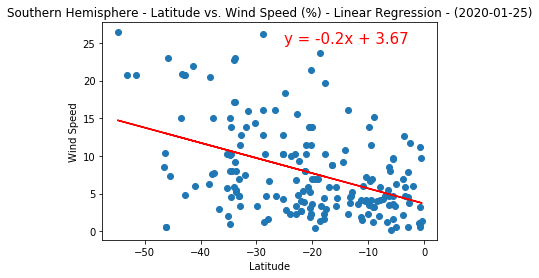

<Figure size 432x288 with 0 Axes>

In [54]:
#Southern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Wind Speed"
labelposition = (-25,25)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../output_data/Wind Speed - Linear Regression - Southern Hemisphere.png")

In [55]:
# Wind Speed (mph) vs. Latitude Linear Regression
#  It appears that for both hemispheres the further from the equator you get the experienced stronger 
#     winds than those in a city near the equator.

In [56]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,mataura,MATAURA,1.580011e+09,-46.19,168.86,58.0,77.65,64,0.58
1,andreapol,ANDREAPOL,1.580011e+09,56.65,32.27,86.0,27.68,49,7.45
2,nueva loja,NUEVA LOJA,1.580011e+09,0.08,-76.88,98.0,72.50,100,1.43
3,udachnyy,UDACHNYY,1.580011e+09,66.42,112.40,74.0,-25.60,100,6.71
5,lebu,LEBU,1.580011e+09,-37.62,-73.65,85.0,61.23,0,7.78


## THE END